Question 1: What is Simple Linear Regression?

->Simple Linear Regression is a statistical method used to find the relationship between one independent variable (X) and one dependent variable (Y) by fitting a straight line to the data.
The line is represented by the equation:
Y=β0​+β1​X+ε

Y = Dependent variable

X = Independent variable

β₀ = Intercept

β₁ = Slope

ε = Error term

example:
Predicting a student’s score (Y) based on hours studied (X).
goal:
To find the best-fit line that minimizes the difference between the actual and predicted values.

Question 2: What are the key assumptions of Simple Linear Regression?

->The key assumptions of Simple Linear Regression are:

Linearity:
The relationship between the independent variable (X) and dependent variable

Independence:
The observations are independent of each other.

Homoscedasticity:
The variation of errors will be constyatnt.
Errors should not increase or decrease with X.

Normality of Errors:
The errors should be normally distributed.

No Multicollinearity:
No two or more independent variables (features) in a regression model are highly correlated with each other.


Question 3: What is heteroscedasticity, and why is it important to address in regression
models?
->Heteroscedasticity means that the variance of the residuals (errors) is not constant across all levels of the independent variables.

In simple terms:
When the spread of errors increases or decreases as X changes, heteroscedasticity exists.

example:
If we are  predicting income based on education level, the variation in income might be small for low education but very large for higher education — this shows heteroscedasticity.

Why it’s important:

Violates regression assumption:
Linear regression assumes constant error variance.

Leads to unreliable results:

The model’s standard errors become biased.

Hypothesis tests (t-tests, F-tests) become invalid.

Confidence intervals and p-values become misleading.

Question 4: What is Multiple Linear Regression?

->Multiple Linear Regression is a statistical technique used to predict the value of a dependent variable (Y) based on two or more independent variables (X₁, X₂, X₃, ...).
equation:
Y=β0​+β1​X1​+β2​X2​+β3​X3​+...+βn​Xn​+ε

Y = Dependent variable

β₀ = Intercept

β₁, β₂, ..., βₙ = Coefficients

X₁, X₂, ..., Xₙ = Independent variables

ε = Error term

for example:
Predicting house price using:

size

location_score

number_of_rooms

Question 5: What is polynomial regression, and how does it differ from linear
regression?
->Polynomial Regression is a type of regression analysis where the relationship between the independent variable (X) and the dependent variable (Y) is modeled as an nth-degree polynomial.

It is used when data shows non-linear relationship rather than a straight line.

equation:
Y=β0​+β1​X+β2​X2+β3​X3+...+βn​Xn+ε

example:
If the relationship between study hours (X) and marks (Y) is curved, then a polynomial regression fits better than a straight line.

Difference between Linear and Polynomial Regression:

linear regression:

Relationship will be linear relationship.

used when data shows a linear trend.

Model type will be linear in both variables and coefficients.

Polynomial Regression

Relationship will be non linear relationship.

used when data shows  a curved or quadratic trend.

Model type will be non-linear in variables but linear in coefficients.

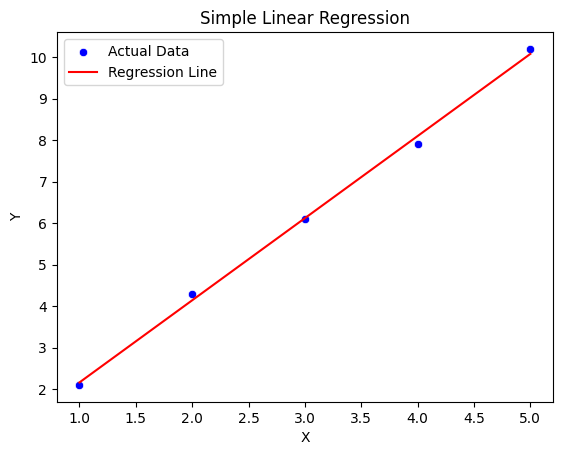

In [5]:
'''Question 6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.
'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
x = [1, 2, 3, 4, 5]
y = [2.1, 4.3, 6.1, 7.9, 10.2]
x = pd.DataFrame(x,columns = ['A'])
y = pd.DataFrame(y,columns = ['B'])
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
sns.scatterplot(x = x['A'],y = y['B'], color='blue', label='Actual Data')
plt.plot(x['A'],y_pred,color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [1]:
'''Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.
'''
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)
X = df[['Area', 'Rooms']]
y = df['Price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Sat, 11 Oct 2025   Prob (F-statistic):             0.0377
Time:                        12:38:28   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Intercept: 0.06000000000000938
Coefficients: [0.   1.94 0.2 ]


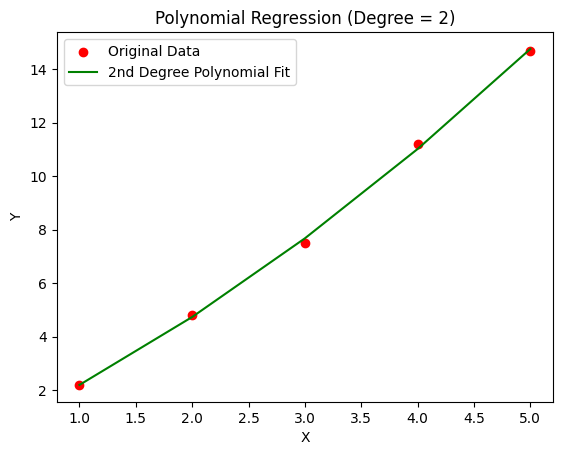

In [3]:
'''Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

Y_pred = model.predict(X_poly)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

plt.scatter(X, Y, color='red', label='Original Data')
plt.plot(X, Y_pred, color='green', label='2nd Degree Polynomial Fit')
plt.title('Polynomial Regression (Degree = 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


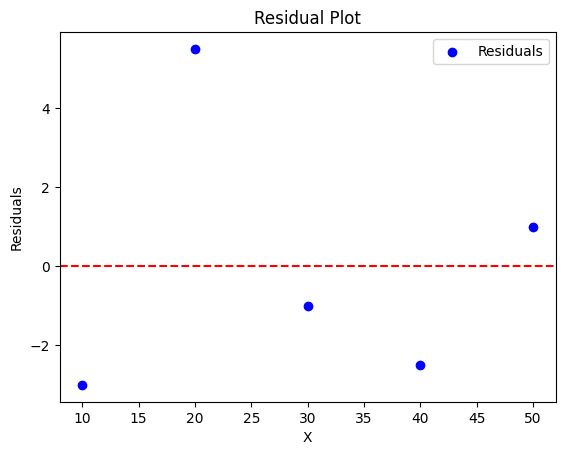

In [4]:
'''Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

residuals = Y - Y_pred

plt.scatter(X, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.show()


Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.

->As a data scientist predicting house prices, if I detect heteroscedasticity and multicollinearity, I would take the following steps to correct them:

1. Addressing Heteroscedasticity (Unequal variance of residuals):

Visual check: Use a residual plot to confirm non-constant variance.

Transform target or features: Apply transformations such as
log(Y) or √Y to stabilize variance.

Use Weighted Least Squares (WLS): Assign smaller weights to points with higher variance.

Robust Regression: Use models like statsmodels.RLM() that are less sensitive to heteroscedasticity.

2. Addressing Multicollinearity (High correlation between predictors):

Check correlation matrix & VIF: Identify which variables are highly correlated (VIF > 10).

Remove redundant features: Drop one of the correlated variables (e.g., Area or Rooms).

Combine correlated features: Create a composite feature (e.g., Total_Space = Area × Rooms).

Apply Regularization:

Use Ridge or Lasso Regression to penalize large coefficients and reduce multicollinearity.

3. Final Step – Re-evaluate Model:

Re-fit the model after corrections.

Check assumptions again (normality, linearity, equal variance).

Compare performance metrics (R², RMSE) to ensure model stability.